 
 <div class="alert alert-warning"> <label style=" font-size: 50px;"> <span style="color:black" >projet : Classification des Tweets</span></label> 
    <h1>Thameur Amal 3DNI1</h1>

</div><br>

<i><h2><span style="color:blue" >Ojectifs:</span></h2></i>
<p style=" font-size: 20px;">•Maitriser l’API de twitter pour l’extraction des tweets<br>
•Maitriser la partie NLP (naturallanguageprocessing) avec NLTK en Python<br>
•Appliquer les principes de nettoyage des données<br>
•Classer les tweets: regrouper ensemble les tweets qui sont similaires.C’est une étape qui peut être considérée comme une étape <br>
</p>
<i><h2><span style="color:blue" >Spécifications</span></h2></i>
<p style=" font-size: 20px;">
Imaginons que vous avez  un compte Twitter, et que vous lez suivre les tweets (texte très court)sur ce réseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n’avezpas la possibilité deleslire  tous.  Pour  cela,  vous  avez  besoin d’une application qui va jouer le rôle d’assistantet quiva  vous effectuer un résumé de toutes ces informations. Une des approchesqu’on peut utiliser estde le classer sous former de groupesde sorte à ce qu’on présente à l’utilisateur un seul Tweet de chaque groupe. Pour cela, on doit procéder en trois grandes étapes:
</p>
 


<div class="alert alert-info">
      <label style=" font-size: 50px;"> <span style="color:black" >I:Prétraitement des  tweets</span></label>
   </div>

Télécharger  les Tweets à partir de Twitter en utilisant l’API de twitter. Pour cela, vous devriez un compte «Twitter Developer».
* consumer_key = "ry9GMoJRUCdsHo89bkpVosu8T" 
* consumer_secret = "y9Yy5X6RE3n6hEogGhVYCmGDKgDPhWuQB8sexc61xKH01Xv6MA" 
* access_key = "1330861473481052162-NXO8xkGNxf0g6A7wbOjOfMPKZrfUvT" 
* access_secret = "20Ye373RjvjjMfpbPHAW6kbwJURRbqRaQsnMYFBCrZpyw" 

In [17]:
#Libraries
import pandas as pd 
import tweepy 

In [18]:
# function to display data of each tweet
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 
  
  
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "ry9GMoJRUCdsHo89bkpVosu8T"
    consumer_secret = "y9Yy5X6RE3n6hEogGhVYCmGDKgDPhWuQB8sexc61xKH01Xv6MA"
    access_key = "1330861473481052162-NXO8xkGNxf0g6A7wbOjOfMPKZrfUvT"
    access_secret = "20Ye373RjvjjMfpbPHAW6kbwJURRbqRaQsnMYFBCrZpyw"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 500
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!') 


Enter Twitter HashTag to search for


 music


Enter Date since The Tweets are required in yyyy-mm--dd


 2020-12-18



Tweet 1:
Username:honeygirasol
Description:mhm mhm @ashley_murphy23🙈 🔪🖤🩸
Location:California, USA
Following Count:254
Follower Count:318
Total Tweets:6248
Retweet Count:1
Tweet Text:The reason I mix is because no matter what bullshit I’m going through, it’s just me and my fucking music, now THATS when I’m the happiest
Hashtags Used:[]

Tweet 2:
Username:victoriaalexis_
Description:fuck racists.
Location:California, USA
Following Count:68
Follower Count:89
Total Tweets:8507
Retweet Count:11566
Tweet Text:Doing your makeup half naked w music blasting is a fucking vibe
Hashtags Used:[]

Tweet 3:
Username:934WMIX
Description:https://t.co/hTDj8lBOq5 Available in the @TuneIn App https://t.co/fB87HqGmVa…
Location:Detroit, MI
Following Count:1120
Follower Count:1333
Total Tweets:245958
Retweet Count:0
Tweet Text:NowPlaying Life stream https://t.co/cj101eO74t - Great Wu @greatwu_sk ft James Knight Hosted by DJs @DJGreenguy @djkingassassin #RadioImpact Mo Music 20:13
Hashtags Used:['RadioImpact

<label style=" font-size: 20px;"> <span style="color:DarkSalmon" >Exploration du dataset</span></label>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('scraped_tweets.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df.shape)
df.head()
df_1= pd.read_csv('scraped_tweets1.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df_1.shape)
df_1.head()
df_2 = pd.read_csv('scraped_tweets2.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df_2.shape)
df_2.head()
df_3= pd.read_csv('scraped_tweets3.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df_3.shape)
df_3.head()

df_4= pd.read_csv('scraped_tweets1.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df_4.shape)
df_4.head()
df_5= pd.read_csv('scraped_tweets1.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df_5.shape)
df_5.head()
df_6= pd.read_csv('scraped_tweets6.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", df_6.shape)
df_6.head()

shape  (500, 10)
shape  (2000, 10)
shape  (911, 10)
shape  (1500, 10)
shape  (2000, 10)
shape  (2000, 10)
shape  (2985, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[]
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[]
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[]
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[]
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports']


In [25]:
#Jusq'au la on a reussi a collecter deux datasets,Je vais les concatiner et l'enregister dans un seul fichier CSV
df_final=pd.concat([df, df_1,df_2,df_3,df_4,df_5,df_6], ignore_index=True)
print(df_final.shape) 
df_final.head()

(11896, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,honeygirasol,mhm mhm @ashley_murphy23🙈 🔪🖤🩸,"California, USA",254,318,6248,1,The reason I mix is because no matter what bul...,[]
1,1,victoriaalexis_,fuck racists.,"California, USA",68,89,8507,11566,Doing your makeup half naked w music blasting ...,[]
2,2,934WMIX,https://t.co/hTDj8lBOq5 Available in the @Tune...,"Detroit, MI",1120,1333,245958,0,NowPlaying Life stream https://t.co/cj101eO74t...,['RadioImpact']
3,3,TomGirard,"Word writer, radio talker, movie watcher, guit...",Guernsey,2699,1703,30465,0,Getting the show ‘in the can’ early this month...,"['music', 'newmusic', 'livemusic', 'radio', 'b..."
4,4,MixedLiterature,Dies ist ein Bot. Es werden Elemente aus der L...,Deutschland,12,61,26257,0,"Now also in englisch, since many of my followe...",[]


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11896 entries, 0 to 11895
Data columns (total 10 columns):
Unnamed: 0      11896 non-null int64
username        11896 non-null object
description     10726 non-null object
location        8268 non-null object
following       11896 non-null int64
followers       11896 non-null int64
totaltweets     11896 non-null int64
retweetcount    11896 non-null int64
text            11896 non-null object
hashtags        11896 non-null object
dtypes: int64(5), object(5)
memory usage: 929.5+ KB


<label style=" font-size: 20px;"> <span style="color:DarkSalmon" >Supprimer les colonnes inutiles</span></label>

In [27]:
to_drop = ['Unnamed: 0', 'username', 'description', 'location', 'following', 'followers', 'totaltweets', 'retweetcount', 'hashtags']
#Eliminer les colonnes dans la liste de to_drop du dataframe df 
df_final.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat 
df_final.head(10)

,text
0,The reason I mix is because no matter what bul...
1,Doing your makeup half naked w music blasting ...
2,NowPlaying Life stream https://t.co/cj101eO74t...
3,Getting the show ‘in the can’ early this month...
4,"Now also in englisch, since many of my followe..."
5,Is this argument of football and music really ...
6,I WAS IN THE SHOWER AND I DIDNT WANNA HEAR SNO...
7,Davido JOWO has surpassed both smile and no s...
8,who did more for the music industry?\n\nrt/lik...
9,Doing your makeup half naked w music blasting ...


<label style=" font-size: 20px;"> <span style="color:DarkSalmon" >Tweets Cleaning</span></label>

<p style=" font-size: 20px;">Les tweets contiennent des objets inutiles tels que des hashtags, des mentions, des liens et des signes de ponctuation qui peuvent affecter les performances d'un algorithme et doivent donc être supprimés. Tous les textes sont convertis en minuscules pour éviter que les algorithmes n'interprètent les mêmes mots avec des cas différents comme différents.</p>

In [28]:
import nltk
import numpy as np
import warnings 
def standardize_text(df, text_field):
    df_final[text_field] = df_final[text_field].str.replace(r"http\S+", "")
    df_final[text_field] = df_final[text_field].str.replace(r"http", "")
    df_final[text_field] = df_final[text_field].str.replace(r"@\S+", "")
    df_final[text_field] = df_final[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df_final[text_field] = df_final[text_field].str.replace(r"@", "at")
    df_final[text_field] = df_final[text_field].str.lower()
    return df_final

questions = standardize_text(df_final, "text")
questions['text']= questions['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
questions.head()

,text
0,reason because matter what bullshit going thro...
1,doing your makeup half naked music blasting fu...
2,nowplaying life stream great james knight host...
3,getting show early this month boxing evening l...
4,"also englisch, since many followers seem very ..."


In [29]:
questions.head()

,text
0,reason because matter what bullshit going thro...
1,doing your makeup half naked music blasting fu...
2,nowplaying life stream great james knight host...
3,getting show early this month boxing evening l...
4,"also englisch, since many followers seem very ..."


In [30]:
questions.to_csv("clean_data.csv")
questions.head()

    


,text
0,reason because matter what bullshit going thro...
1,doing your makeup half naked music blasting fu...
2,nowplaying life stream great james knight host...
3,getting show early this month boxing evening l...
4,"also englisch, since many followers seem very ..."


<div class="alert alert-info">
      <label style=" font-size: 50px;"> <span style="color:black" >II:Traitement destweets: NLP (Natural LanguageProcessing)</span></label>
   </div>


<p style=" font-size: 20px;"> On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural LanguageProcessing):</p>
<h3><span style="color:Maroon" > Tokenization, Lemmatization and removing stopwords </span></h3>

In [31]:
import nltk 
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to /home/ubunto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<p style=" font-size: 20px;"> <span style="color:Maroon" >Les mots vides(Stopwords)</span> sont des mots couramment utilisés dont la présence dans une phrase a moins de poids que d'autres mots. Ils comprennent des mots comme «et», «ou», «a» et.c.</p>

In [32]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)


{'own', 'the', 'its', 'for', 'of', 'that', "mustn't", 'him', 'but', 'now', 'a', "needn't", 'how', 'into', 'having', 'too', 'aren', 'isn', 'why', 'don', 's', "mightn't", 'has', 'yourselves', "didn't", 'themselves', 'because', 'from', 'here', 're', 'it', 'been', "won't", 'theirs', 'i', 'ma', 'before', 'she', 'itself', 'do', 'then', "she's", 'myself', 'about', 'you', 'mustn', 'won', 'as', 'mightn', 'so', "wasn't", 'what', 'same', 'them', "shan't", 'most', 'than', 'shouldn', 'by', 'and', 'below', 'those', "don't", "you'll", 'd', 'there', "it's", 'your', 'in', 'am', 'at', 'after', 'again', 'me', "couldn't", 'shan', 'this', 'haven', 'during', 'll', 'ourselves', "wouldn't", 'yours', 'over', 'wouldn', 'whom', 'our', 'under', 'once', 'down', 'were', 'himself', 'further', "you'd", 'when', 'other', 'weren', 'can', 'wasn', 'which', 'only', 'these', 'between', 'have', 'her', "aren't", 'through', 'their', "weren't", 'o', 'didn', 'hasn', 'hers', 'up', 'very', 'did', 'some', 'y', 'we', 'are', 'herself

In [33]:
clean_questions = pd.read_csv('clean_data.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("shape ", clean_questions.shape)
clean_questions.head()

shape  (11896, 2)


,Unnamed: 0,text
0,0,reason because matter what bullshit going thro...
1,1,doing your makeup half naked music blasting fu...
2,2,nowplaying life stream great james knight host...
3,3,getting show early this month boxing evening l...
4,4,"also englisch, since many followers seem very ..."


<p style=" font-size: 20px;"> <span style="color:Maroon" >La tokenisation (Tokenization )</span>est le processus de division d'une chaîne en une liste de jetons. Une phrase peut être réduite en mots et un mot peut être réduit en lettres en utilisant les tokenizers appropriés.</p>

In [34]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
clean_questions["text"].dropna(inplace=True)
clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

,Unnamed: 0,text,tokens
0,0,reason because matter what bullshit going thro...,"[reason, because, matter, what, bullshit, goin..."
1,1,doing your makeup half naked music blasting fu...,"[doing, your, makeup, half, naked, music, blas..."
2,2,nowplaying life stream great james knight host...,"[nowplaying, life, stream, great, james, knigh..."
3,3,getting show early this month boxing evening l...,"[getting, show, early, this, month, boxing, ev..."
4,4,"also englisch, since many followers seem very ...","[also, englisch, since, many, followers, seem,..."


In [35]:
clean_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11896 entries, 0 to 11895
Data columns (total 3 columns):
Unnamed: 0    11896 non-null int64
text          11889 non-null object
tokens        11889 non-null object
dtypes: int64(1), object(2)
memory usage: 278.9+ KB


<p style=" font-size: 20px;"> <span style="color:Maroon" >La lemmatisation (Stemmer)</span>réduit un mot à sa forme racine. Par exemple, la forme de racine des «roches» est «roche».</p>

In [36]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

clean_questions["tokens"]=clean_questions["tokens"].dropna().apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
clean_questions.head()

,Unnamed: 0,text,tokens
0,0,reason because matter what bullshit going thro...,"[reason, becaus, matter, what, bullshit, go, t..."
1,1,doing your makeup half naked music blasting fu...,"[do, your, makeup, half, nake, music, blast, f..."
2,2,nowplaying life stream great james knight host...,"[nowplay, life, stream, great, jame, knight, h..."
3,3,getting show early this month boxing evening l...,"[get, show, earli, thi, month, box, even, look..."
4,4,"also englisch, since many followers seem very ...","[also, englisch, sinc, mani, follow, seem, ver..."


In [37]:
clean_questions.head()

,Unnamed: 0,text,tokens
0,0,reason because matter what bullshit going thro...,"[reason, becaus, matter, what, bullshit, go, t..."
1,1,doing your makeup half naked music blasting fu...,"[do, your, makeup, half, nake, music, blast, f..."
2,2,nowplaying life stream great james knight host...,"[nowplay, life, stream, great, jame, knight, h..."
3,3,getting show early this month boxing evening l...,"[get, show, earli, thi, month, box, even, look..."
4,4,"also englisch, since many followers seem very ...","[also, englisch, sinc, mani, follow, seem, ver..."


In [38]:
#from sklearn.feature_extraction.text import TfidfVectorizer 
#tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
## TF-IDF feature matrix 
#tfidf = tfidf_vectorizer.fit_transform(questions["text"])
#print(tfidf)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(questions["text"])
print(X)

  (0, 10838)	1
  (0, 1408)	1
  (0, 8396)	1
  (0, 14651)	1
  (0, 2004)	1
  (0, 5816)	1
  (0, 13508)	1
  (0, 7381)	1
  (0, 5480)	1
  (0, 8893)	1
  (0, 13399)	1
  (0, 14658)	1
  (0, 6163)	1
  (1, 5480)	1
  (1, 8893)	1
  (1, 4038)	1
  (1, 15010)	1
  (1, 8234)	1
  (1, 6117)	1
  (1, 8958)	1
  (1, 1649)	1
  (1, 14305)	1
  (2, 8893)	1
  (2, 9268)	1
  (2, 7890)	1
  :	:
  (11894, 13633)	1
  (11894, 10676)	1
  (11894, 5712)	1
  (11894, 12593)	1
  (11894, 14545)	1
  (11894, 12741)	1
  (11894, 6606)	1
  (11894, 12450)	1
  (11894, 5187)	1
  (11894, 12662)	1
  (11894, 1799)	1
  (11895, 13605)	1
  (11895, 12868)	1
  (11895, 5514)	1
  (11895, 13633)	1
  (11895, 10676)	1
  (11895, 5712)	1
  (11895, 12593)	1
  (11895, 14545)	1
  (11895, 12741)	1
  (11895, 6606)	1
  (11895, 12450)	1
  (11895, 5187)	1
  (11895, 12662)	1
  (11895, 1799)	1


<div class="alert alert-info">
      <label style=" font-size: 50px;"> <span style="color:black" >III:Classification des tweets</span></label>
   </div>


<p style=" font-size: 20px;"> Utiliser l’algorithme K-Means pour  classer  lesTweets  en k classes  (vous  pouvez  essayer  plusieurs valeurs de k allant de 3 à 30 par exemple).</p>

In [39]:
from sklearn.cluster import KMeans
wcss = []

In [40]:
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(3, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    #kmeans algorithm fits to the X dataset
    kmeans.fit(X)
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    wcss.append(kmeans.inertia_)

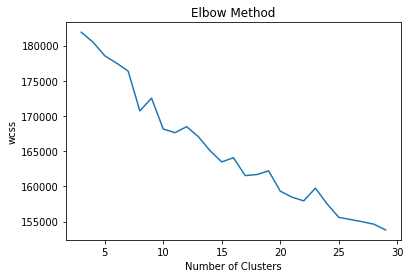

In [41]:
plt.plot(range(3,30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [42]:
#15 According to the Elbow graph we deterrmine the clusters number as 
#15. Applying k-means algorithm to the X dataset.
k =15
Kmeans=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
Kmeans.fit(X)
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
word = cv.get_feature_names()
for i in range(k):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :15]:
        print(' %s' % word[ind], end='')
    print()
print("\n")

Top terms per cluster:
Cluster 0 words: music your awards please this seoul prize party best call never with starters ends will
Cluster 1 words: thing evermore that will always idea have next continue come clung these things keeps days
Cluster 2 words: music this with esthetic from news have video like just more they good love itunes
Cluster 3 words: seokjin sports jin just after iq mind being impressive dots immediately quick connect worked funny
Cluster 4 words: possible whenever culture enjoy determine that something schtick hope karaoke how sports tries podcast many
Cluster 5 words: that music they with like have this just esthetic when their news funny about know
Cluster 6 words: willow stream spotify music apple evermorealbum omgggg please yassss fenwick featured feel feeds feedly feeding
Cluster 7 words: even could caught coming with that able money control tactics home like network such artist
Cluster 8 words: award music with women halle event presented billboard star rising 1

In [43]:
k =6
Kmeans=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
Kmeans.fit(X)
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
word = cv.get_feature_names()
for i in range(k):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word[ind], end='')
    print()
print("\n")

Top terms per cluster:
Cluster 0 words: thing evermore that will always idea have next continue come
Cluster 1 words: music this that with from like esthetic have news they
Cluster 2 words: sports funny that about being just they this like with
Cluster 3 words: media that screaming said being publication with crazy music career
Cluster 4 words: when covid away footy robotdebt it rort funny never bushfires
Cluster 5 words: audio life book music your wherever files easy simple want




In [44]:
k =20
Kmeans=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
Kmeans.fit(X)
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
word = cv.get_feature_names()
for i in range(k):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % word[ind], end='')
    print()
print("\n")

Top terms per cluster:
Cluster 0 words: everything anonymous someone asked request music gone replied fridaylivestream much love thing it that stays why when because only sb19
Cluster 1 words: music with that this like your from have just good listen awards apple more they love will live when best
Cluster 2 words: trask kyle heisman last said race star gators trophy when plaza florida notice stadium about thought someone doesn like pretty
Cluster 3 words: that with like music funny sports even could loud home such money coming people critically acclaimed able caught control raise
Cluster 4 words: sports funny that about like with this just they have people it because think from when what time your being
Cluster 5 words: awards latin radio power hearts jared music gallery gomez certified broken italian selena just tomatoes spanish fresh umiyearlies breaktudo rotten
Cluster 6 words: esthetic news this with from that have funny itunes holiday twigs just will song remix dynamite more about